## Import the required libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

## Load the data from a CSV file.

In [2]:
    data = pd.read_csv('Retail_Sales.csv', parse_dates=['OrderDate'], dtype = {'Region': 'category', 'Category': 'category'})

In [3]:
## Understand the data.

### Display few rows of the DataFrame

In [4]:
data.head()

,OrderID,CustomerName,Category,ProductName,Region,OrderDate,Quantity,Price,TotalSales
0,bd69f24a,Peter Dunn,Clothing,Coffee Table,South,2023-05-07,4,95.44,381.76
1,7062cd52,Hunter Miller,Electronics,Tablet,North,2023-01-31,1,348.56,348.56
2,45d0a7a9,Kimberly Malone,Clothing,Chair,South,2024-10-29,1,199.50,199.50
3,0d493079,Crystal Porter,Clothing,Smartphone,North,2023-03-04,10,469.00,4690.00
4,b7fb0716,Alex Delacruz,Electronics,Chair,North,2024-04-27,4,77.39,309.56


### Summarize data types and statistics

In [5]:
data.dtypes

OrderID                 object
CustomerName            object
Category              category
ProductName             object
Region                category
OrderDate       datetime64[ns]
Quantity                 int64
Price                  float64
TotalSales             float64
dtype: object

In [6]:
data.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,50.0,4.4000,2.718043,1.00,2.0000,4.00,6.0000,10.0
Price,50.0,255.6784,144.080196,12.48,126.8150,285.26,364.0325,469.0
TotalSales,50.0,1229.6660,1200.372729,14.51,315.5175,759.11,1969.4700,4690.0


In [7]:
data.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderID       50 non-null     object        
 1   CustomerName  50 non-null     object        
 2   Category      50 non-null     category      
 3   ProductName   50 non-null     object        
 4   Region        50 non-null     category      
 5   OrderDate     50 non-null     datetime64[ns]
 6   Quantity      50 non-null     int64         
 7   Price         50 non-null     float64       
 8   TotalSales    50 non-null     float64       
dtypes: category(2), datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 12.1 KB


## Handle missing / null values

In [8]:
data.isnull().sum()

OrderID         0
CustomerName    0
Category        0
ProductName     0
Region          0
OrderDate       0
Quantity        0
Price           0
TotalSales      0
dtype: int64

#### No null / missing values found. So, there is no requirement to handle the missing values (like dropping or impute the missing values).

## Check for duplicate rows / values

In [9]:
data[data.duplicated()]

,OrderID,CustomerName,Category,ProductName,Region,OrderDate,Quantity,Price,TotalSales


#### No duplicate data found.

In [10]:
data.columns

Index(['OrderID', 'CustomerName', 'Category', 'ProductName', 'Region',
       'OrderDate', 'Quantity', 'Price', 'TotalSales'],
      dtype='object')

#### As all the columns has relevant names we do not need to change the column names as well.

## Exploratary Data Analysis

In [11]:
Numeric_Columns = data.select_dtypes(include = np.number).columns
Categorical_Columns = data.select_dtypes(exclude = np.number).columns

In [12]:
Numeric_Columns.to_list()

['Quantity', 'Price', 'TotalSales']

In [13]:
Categorical_Columns.to_list()

['OrderID', 'CustomerName', 'Category', 'ProductName', 'Region', 'OrderDate']

In [14]:
data[Numeric_Columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,50.0,4.4000,2.718043,1.00,2.0000,4.00,6.0000,10.0
Price,50.0,255.6784,144.080196,12.48,126.8150,285.26,364.0325,469.0
TotalSales,50.0,1229.6660,1200.372729,14.51,315.5175,759.11,1969.4700,4690.0


In [15]:
Numeric_Columns.to_list()

['Quantity', 'Price', 'TotalSales']

## Visualize Numeric Columns using Box Plot, KDE Plot and Distribution / Histogram Plots

### Boxplot of Numeric Columns

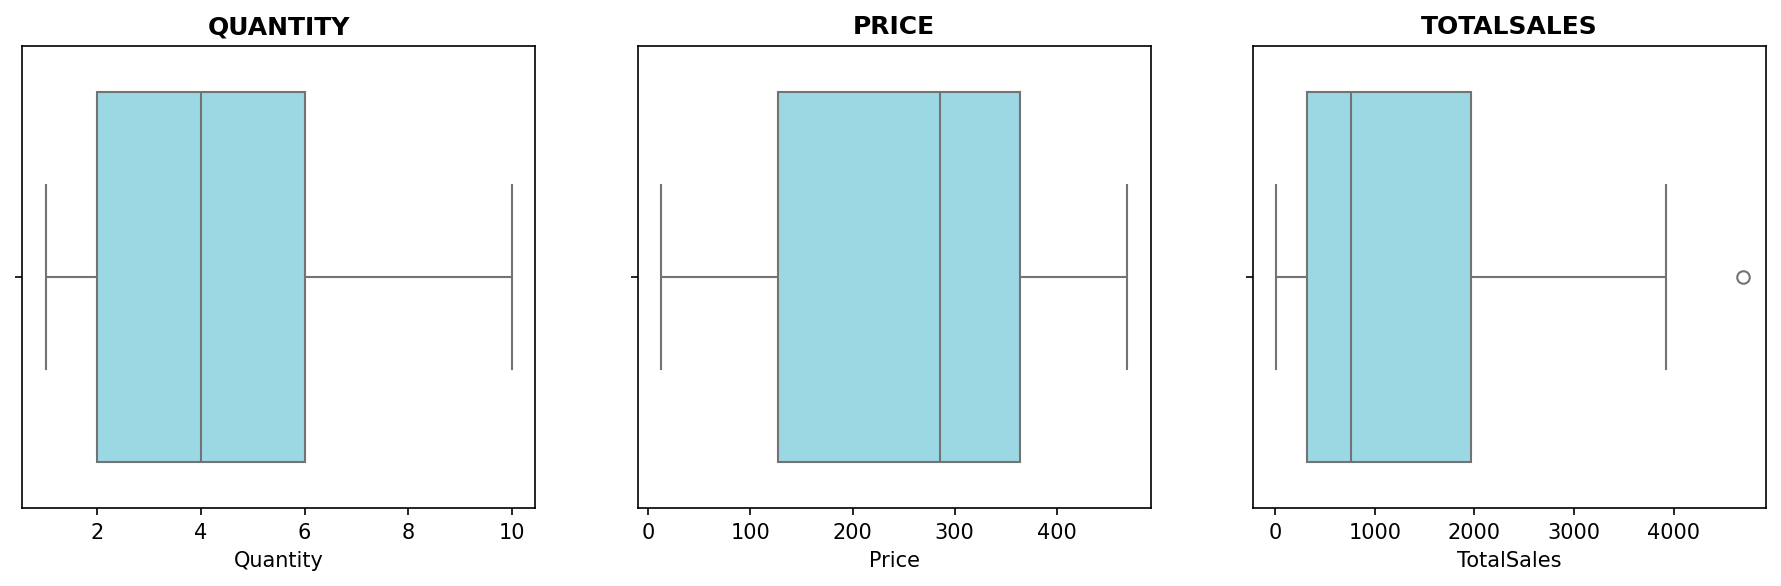

In [16]:
fig, axes = plt.subplots(ncols = 3, figsize = (15,4), dpi = 150)

for col, axis in zip(data[Numeric_Columns], axes):
    sns.boxplot(data, x = data[col], ax = axis, color = '#90e0ef')
    axis.set_title(col.upper(), fontweight = 'bold')

### KDE Plot of Numeric Columns

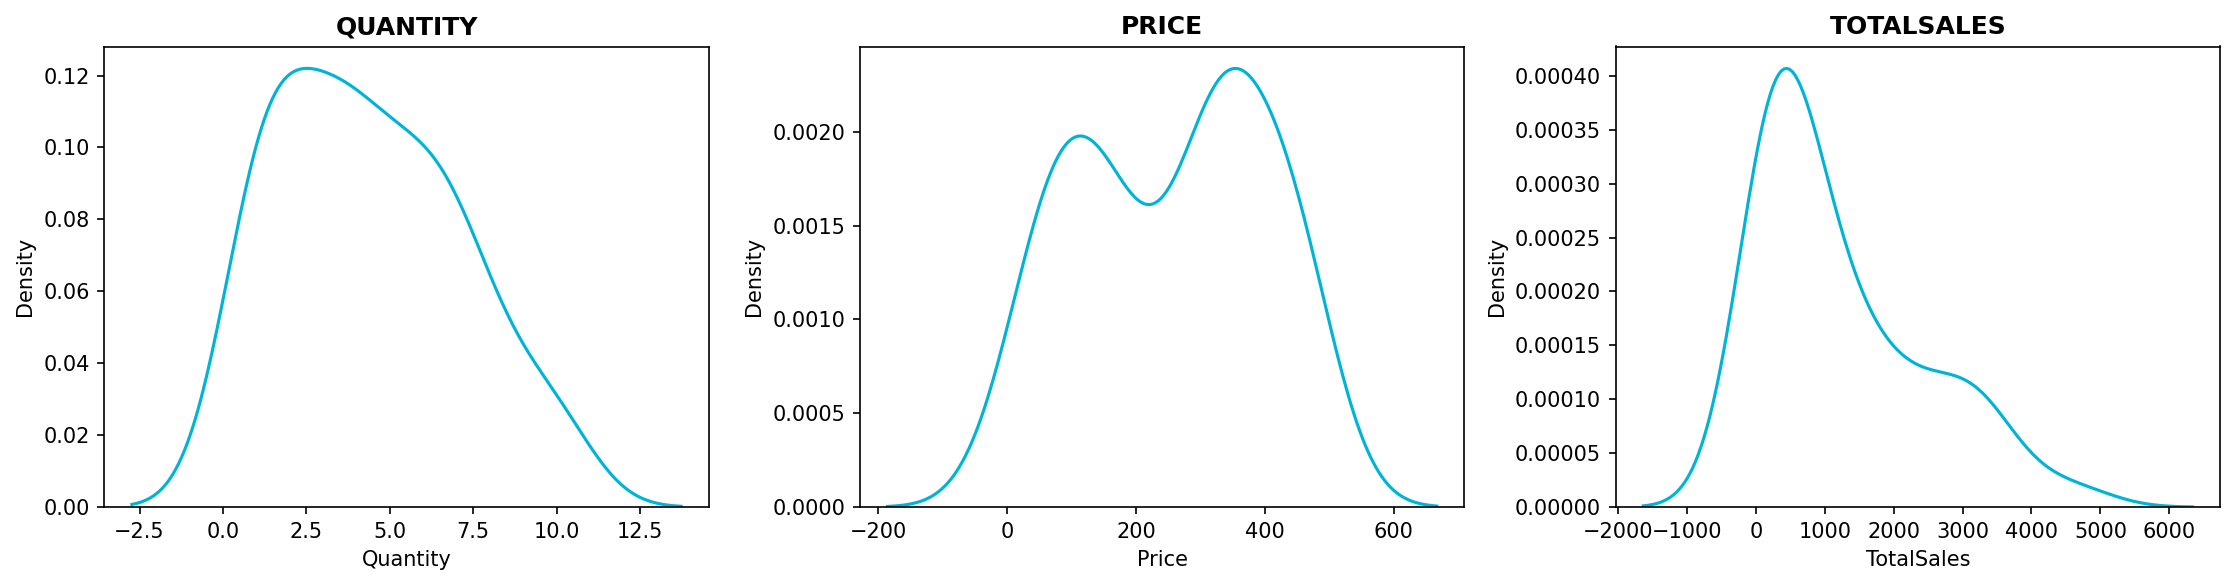

In [17]:
fig, axes = plt.subplots(ncols = 3, figsize = (15,4), dpi = 150)

for col, axis in zip(data[Numeric_Columns], axes):
    sns.kdeplot(data, x = data[col], ax = axis, color = '#00b4d8')
    axis.set_title(col.upper(), fontweight = 'bold')

plt.tight_layout()

### Distribution (Histogram Plot) of Numeric Columns

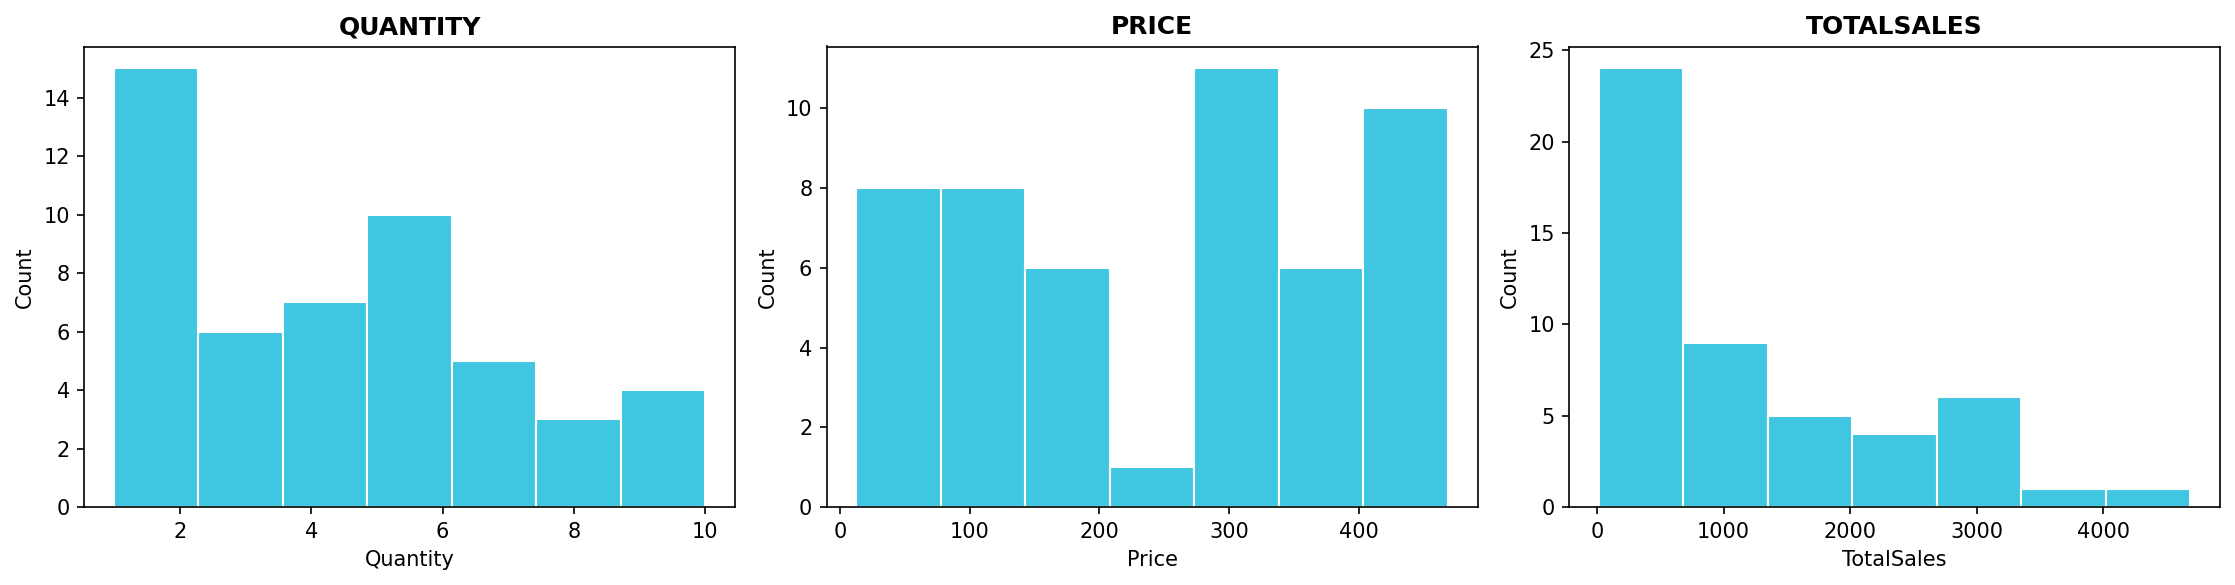

In [18]:
fig, axes = plt.subplots(ncols = 3, figsize = (15,4), dpi = 150)

for col, axis in zip(data[Numeric_Columns], axes):
    sns.histplot(data, x = data[col], ax = axis, color = '#00b4d8', edgecolor = 'white')
    axis.set_title(col.upper(), fontweight = 'bold')

plt.tight_layout()

### Correlation Matrix of all Numeric Columns

<Axes: >

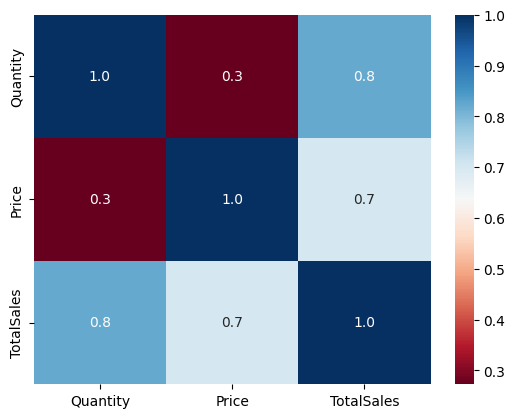

In [19]:
corr_matrix_num_cols = data[Numeric_Columns].corr()
sns.heatmap(corr_matrix_num_cols, annot = True, fmt = '0.1f', cmap = 'RdBu')

## Visualization of Categorical Variables / Columns

### Total Sales by Category

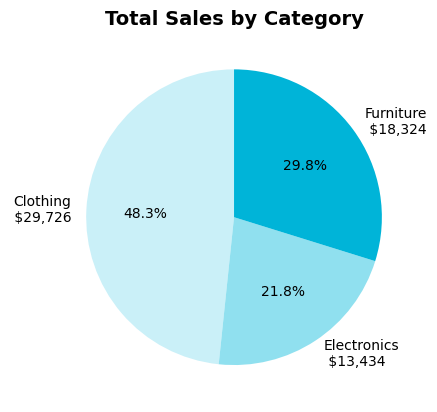

In [20]:
# Total Sales by Category

sales_by_category = data.groupby('Category', observed = False)['TotalSales'].sum().round()
labels = [f'{category}\n ${value:,.0f}' for category, value in zip(sales_by_category.index, sales_by_category)]
plt.pie(sales_by_category, autopct = '%0.1f%%', startangle = 90, labels = labels, colors = ['#caf0f8', '#90e0ef', '#00b4d8'])
plt.title('Total Sales by Category', fontsize = 14, fontweight = 'bold');

### Average Quantity Sold by Region

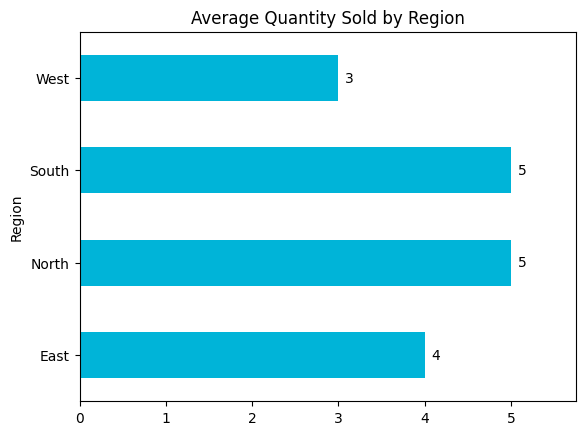

In [21]:
avg_qty_sold_by_region = data.groupby('Region', observed = False)['Quantity'].mean().round()
ax = avg_qty_sold_by_region.plot( kind = 'barh', color = '#00b4d8')

ax.margins(x=0.15)
for i in ax.containers:
    ax.bar_label(i, fmt = '{:,.0f}', padding = 5)
plt.title('Average Quantity Sold by Region');

### Total Sales by Region and Category

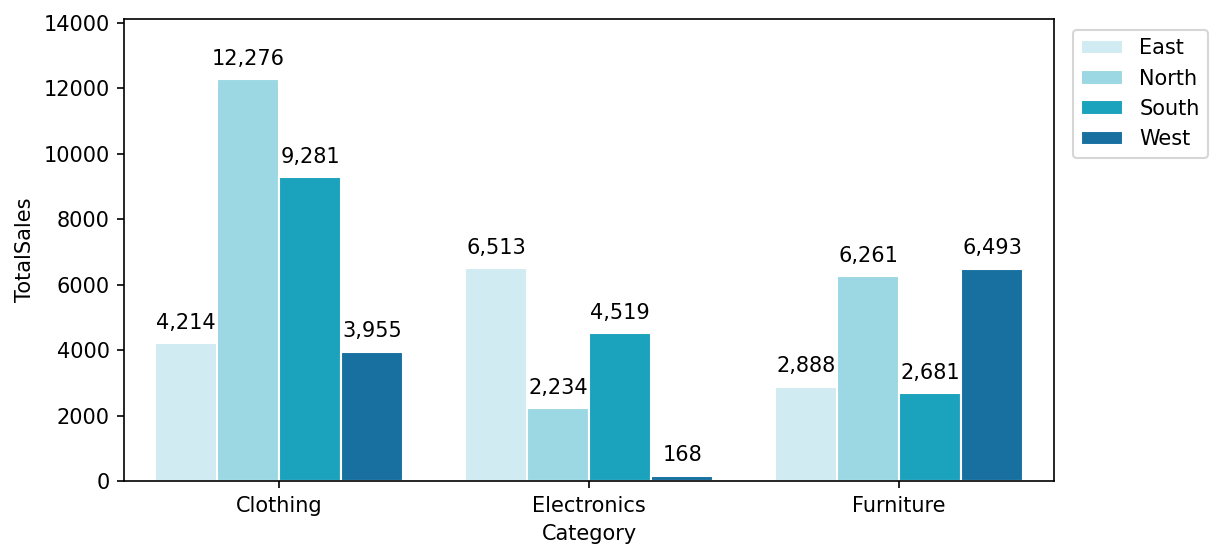

In [22]:


plt.figure(dpi = 150, figsize = (8,4))
grouped_data = data.groupby(['Region', 'Category'], observed = False)['TotalSales'].sum().round().reset_index()
ax = sns.barplot(
    grouped_data,
    x = 'Category', 
    y = 'TotalSales', 
    hue = 'Region',
    palette = ['#caf0f8', '#90e0ef', '#00b4d8', '#0077b6'], 
    edgecolor = 'white'
)
ax.margins(y=0.15)

for i in ax.containers:
    ax.bar_label(i, fmt = '{:,.0f}', padding = 5)
plt.legend(loc = (1.02, 0.7));

In [23]:
Categorical_Columns.to_list()

['OrderID', 'CustomerName', 'Category', 'ProductName', 'Region', 'OrderDate']

In [24]:
Numeric_Columns.to_list()

['Quantity', 'Price', 'TotalSales']

### Top 10 Products by Total Sales

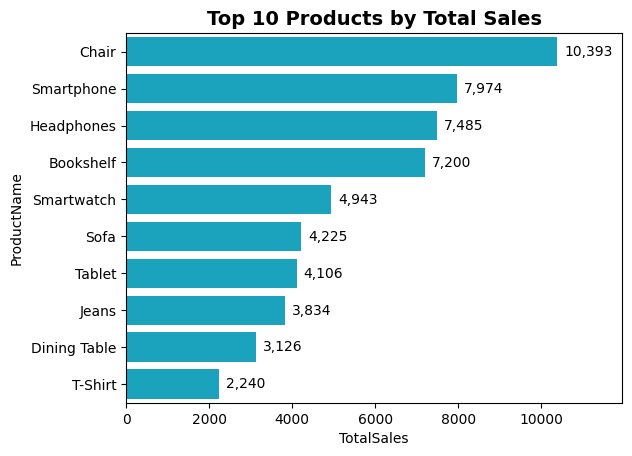

In [25]:
top_products_sales = data.groupby('ProductName')['TotalSales'].sum().round().sort_values(ascending = False).iloc[:10].reset_index()
ax = sns.barplot(top_products_sales, x = 'TotalSales', y = 'ProductName', color = '#00b4d8')
ax.margins(x = 0.15)
plt.title('Top 10 Products by Total Sales', fontsize = 14, fontweight = 'bold')

for i in ax.containers:
    ax.bar_label(i, fmt = '{:,.0f}', padding = 5)

### Total Sales by Quarter

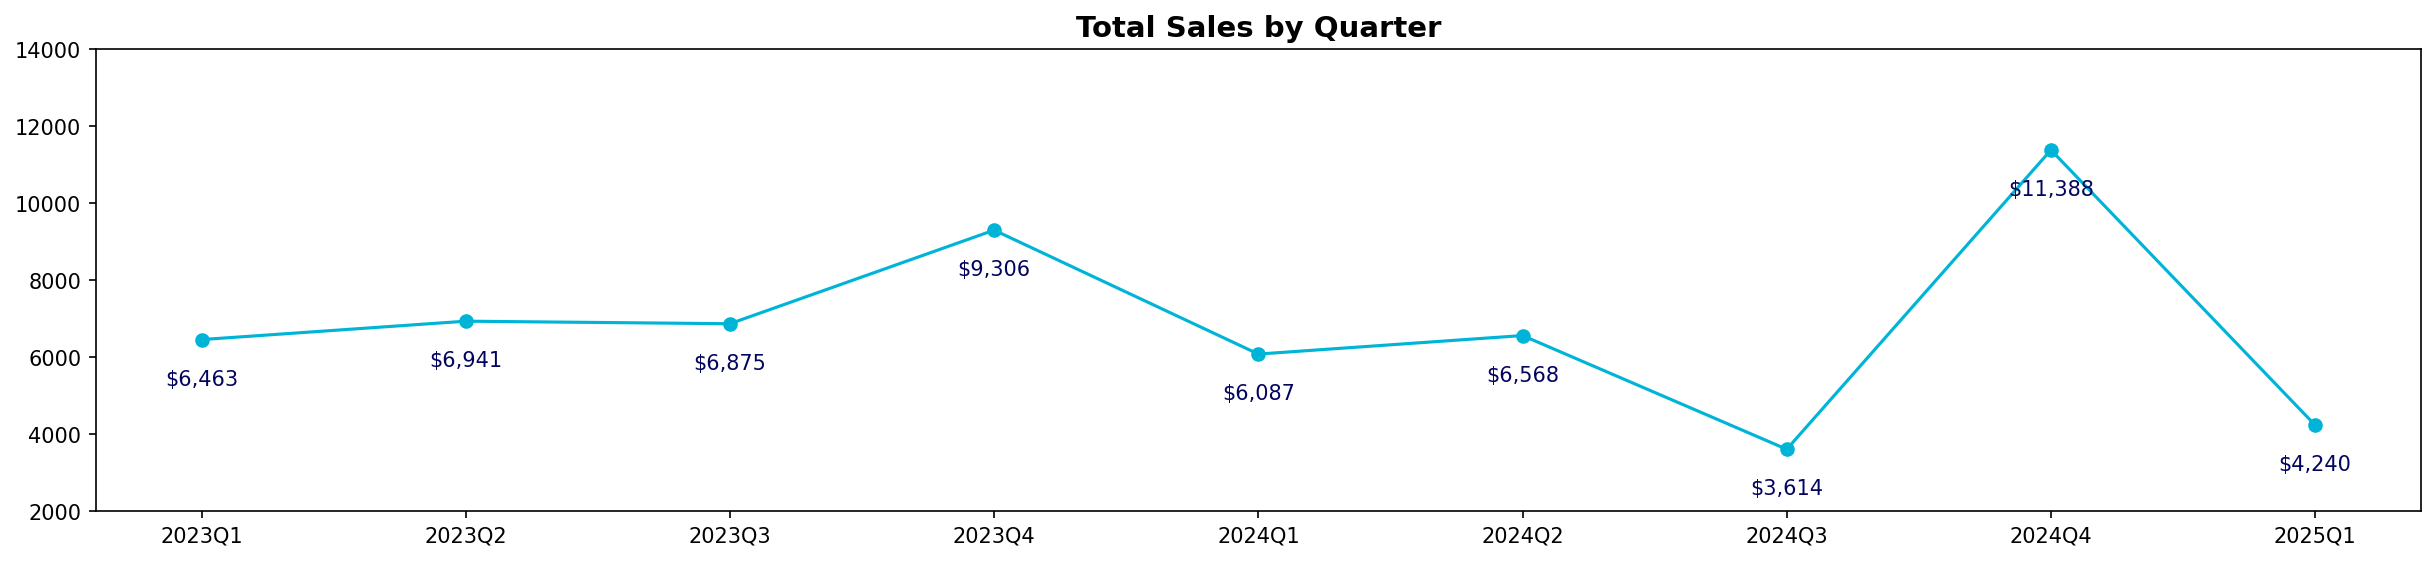

In [26]:
plt.figure(figsize=(20,4), dpi = 150)
plt.title('Total Sales by Quarter', fontsize = 14, fontweight = 'bold')
line_data = data.groupby(data['OrderDate'].dt.to_period('Q'))['TotalSales'].sum().round()
line = plt.plot(line_data.index.astype(str), line_data, marker = 'o', color = '#00b4d8')[0]
plt.ylim(2000,14000)

ymin, ymax = line.get_ydata().min(), line.get_ydata().max()
offset = (ymax - ymin) * 0.1

for x, y in zip(line.get_xdata(), line.get_ydata()):
    plt.text(x, y - offset, f'${y:,.0f}', ha = 'center', va = 'top', fontsize = 10, color = '#03045e')

In [27]:
Numeric_Columns.to_list()

['Quantity', 'Price', 'TotalSales']

In [28]:
Categorical_Columns.to_list()

['OrderID', 'CustomerName', 'Category', 'ProductName', 'Region', 'OrderDate']

### Customer with Maximum Sales per Category

In [29]:
max_sales_per_category_customer = (
    data.groupby(['Category', 'CustomerName'], observed=False)['TotalSales']
    .sum()
    .reset_index()
    .sort_values(by = 'TotalSales', ascending = False)
)


In [30]:
max_sales_per_category_customer

,Category,CustomerName,TotalSales
15,Clothing,Crystal Porter,4690.00
63,Electronics,Cheryl Riley,3921.40
21,Clothing,Dorothy Santana,3322.30
39,Clothing,Pamela Dodson,3283.52
35,Clothing,Mark Adams,3230.73
...,...,...,...
1,Clothing,Alex Delacruz,0.00
74,Electronics,Frank Hall,0.00
25,Clothing,Hunter Miller,0.00
72,Electronics,Duane Snyder,0.00


In [31]:
max_sales_per_category_customer = max_sales_per_category_customer.groupby('Category', observed=False).first().reset_index()


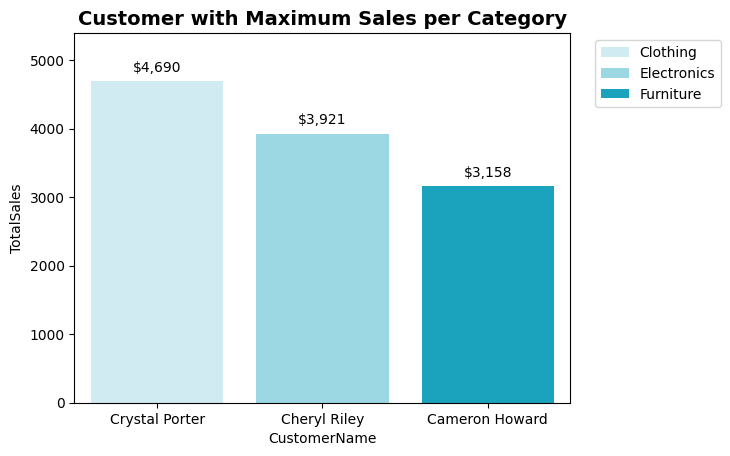

In [32]:
ax = sns.barplot(x='CustomerName', y='TotalSales', data=max_sales_per_category_customer, hue = 'Category', palette=['#caf0f8', '#90e0ef', '#00b4d8'])
ax.margins(y = 0.15)
plt.title('Customer with Maximum Sales per Category', fontsize = 14, fontweight = 'bold')

for i in ax.containers:
    ax.bar_label(i, fmt = '${:,.0f}', padding = 5)

plt.legend(loc = (1.05, 0.8));

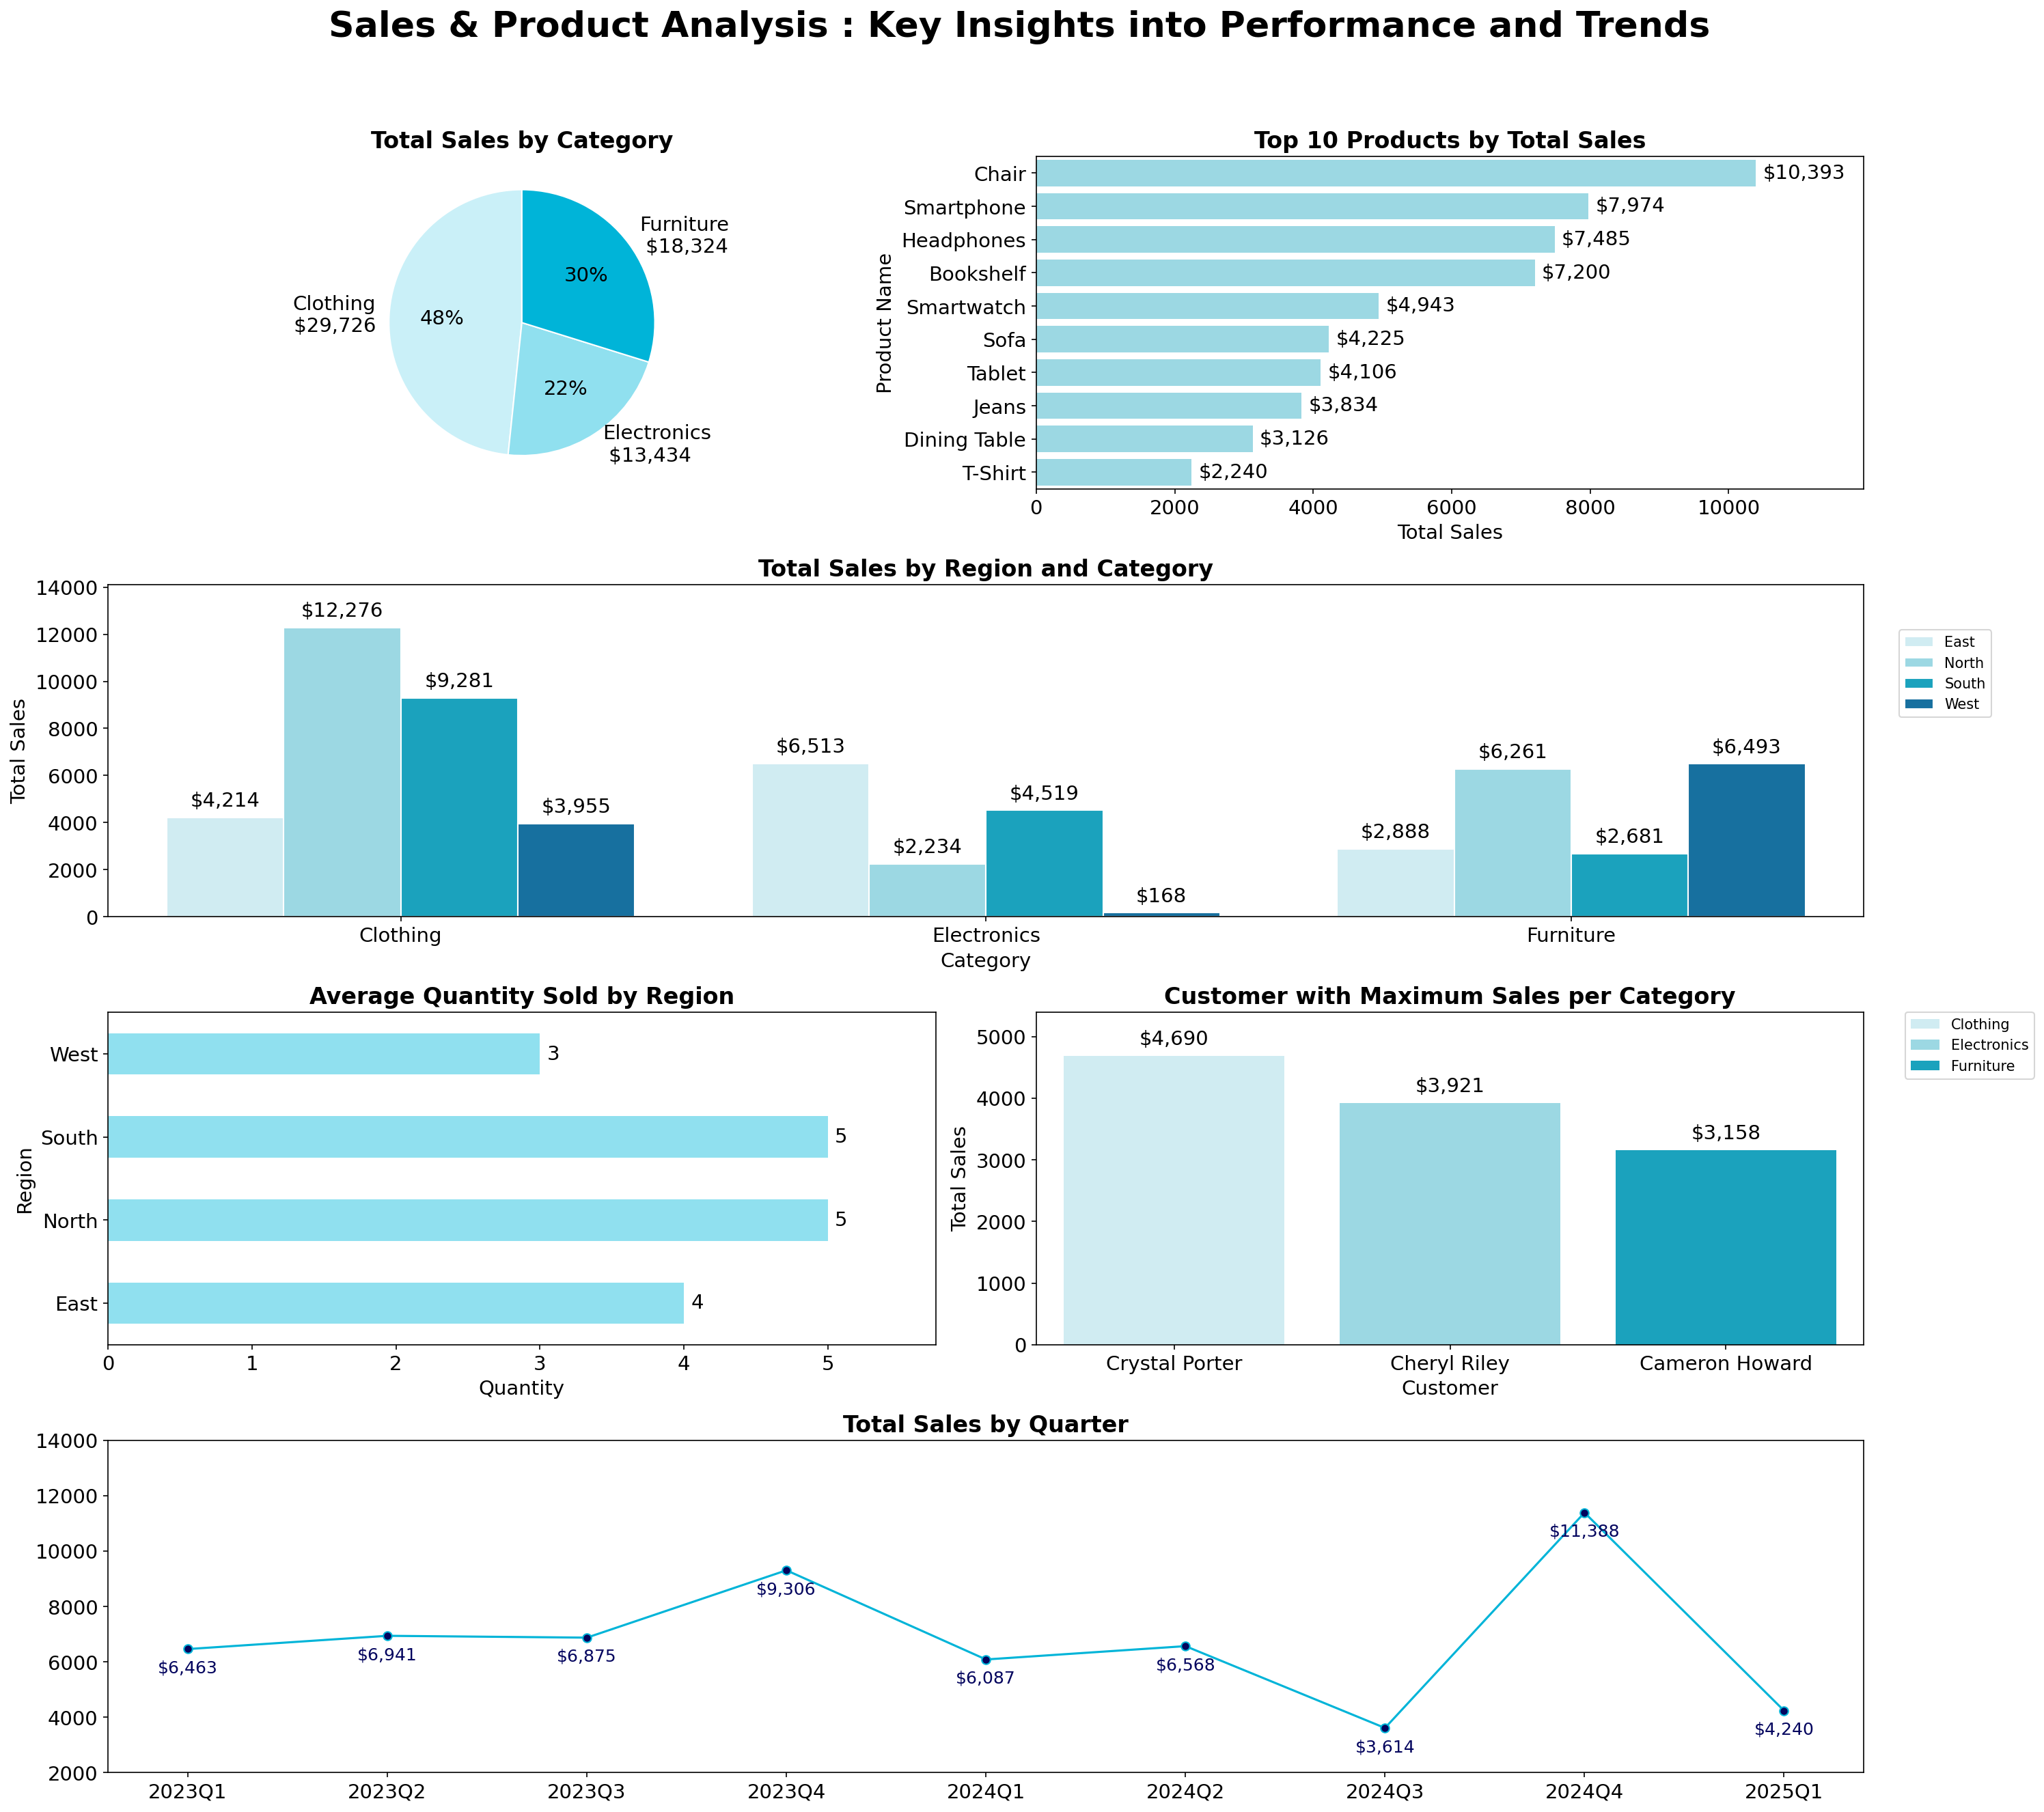

In [33]:
fig = plt.figure(figsize = (20,18), dpi = 150)

gs = GridSpec(4, 2, figure=fig)  # 4 rows, 2 columns grid layout

ax1 = fig.add_subplot(gs[0, 0])  # Pie: Total Sales by Category
ax2 = fig.add_subplot(gs[0, 1])  # Horizontal Bar: Top 10 Products by Total Sales
ax3 = fig.add_subplot(gs[1, :])  # Grouped Bar: Total Sales by Region and Category
ax4 = fig.add_subplot(gs[2, 0])  # Horizontal Bar: Average Quantity Sold by Region
ax5 = fig.add_subplot(gs[2, 1])  # Bar: Customer with Maximum Sales per Category
ax6 = fig.add_subplot(gs[3, :])  # Line: Total Sales by Quarter

plt.suptitle('Sales & Product Analysis : Key Insights into Performance and Trends', fontsize = 25, fontweight = 'bold')

# Pie: Total Sales by Category
sales_by_category = data.groupby('Category', observed = False)['TotalSales'].sum().round()
labels = [f'{category}\n ${value:,.0f}' for category, value in zip(sales_by_category.index, sales_by_category)]
ax1.pie(
    sales_by_category, 
    autopct = '%0.0f%%', 
    startangle = 90,
    labels = labels,
    colors = ['#caf0f8', '#90e0ef', '#00b4d8'],
    textprops = {'fontsize': 14},
    wedgeprops = {'edgecolor': 'white'}
)
ax1.set_title('Total Sales by Category', fontsize = 16, fontweight = 'bold')


# Horizontal Bar: Top 10 Products by Total Sales
top_products_sales = (
    data.groupby('ProductName')['TotalSales']
    .sum()
    .round()
    .sort_values(ascending = False)
    .iloc[:10]
    .reset_index()
)
ax2 = sns.barplot(
    top_products_sales, 
    x = 'TotalSales', 
    y = 'ProductName', 
    color = '#90e0ef', 
    ax = ax2
)
ax2.margins(x = 0.15)
ax2.set_title('Top 10 Products by Total Sales', fontsize = 16, fontweight = 'bold')
ax2.set_xlabel('Total Sales', fontsize = 14)
ax2.set_ylabel('Product Name', fontsize = 14)
ax2.tick_params(axis = 'both', labelsize = 14)

for i in ax2.containers:
    ax2.bar_label(i, fmt = '${:,.0f}', fontsize = 14, padding = 5)

# Grouped Bar: Total Sales by Region and Category
grouped_data = data.groupby(['Region', 'Category'], observed = False)['TotalSales'].sum().round().reset_index()
ax3 = sns.barplot(
    grouped_data,
    x = 'Category', 
    y = 'TotalSales', 
    hue = 'Region',
    palette = ['#caf0f8', '#90e0ef', '#00b4d8', '#0077b6'], 
    edgecolor = 'white',
    ax = ax3
)
ax3.margins(y=0.15)
ax3.set_title('Total Sales by Region and Category', fontsize = 16, fontweight = 'bold')
ax3.set_xlabel('Category', fontsize = 14)
ax3.set_ylabel('Total Sales', fontsize = 14)
ax3.tick_params(axis = 'both', labelsize = 14)

for i in ax3.containers:
    ax3.bar_label(i, fmt = '${:,.0f}', fontsize = 14, padding = 5)
ax3.legend(loc = (1.02, 0.6));

# Horizontal Bar: Average Quantity Sold by Region
avg_qty_sold_by_region = data.groupby('Region', observed = False)['Quantity'].mean().round()
ax4 = avg_qty_sold_by_region.plot( kind = 'barh', color = '#90e0ef', ax = ax4)

ax4.margins(x=0.15)
for i in ax4.containers:
    ax4.bar_label(i, fmt = '{:,.0f}', fontsize = 14, padding = 5)
    
ax4.set_title('Average Quantity Sold by Region', fontsize = 16, fontweight = 'bold')
ax4.set_ylabel('Region', fontsize = 14)
ax4.set_xlabel('Quantity', fontsize = 14)
ax4.tick_params(axis = 'both', labelsize = 14)


# Bar: Customer with Maximum Sales per Category
ax5 = sns.barplot(
    x='CustomerName',
    y='TotalSales', 
    data=max_sales_per_category_customer, 
    hue = 'Category',
    palette=['#caf0f8', '#90e0ef', '#00b4d8'], 
    ax = ax5
)
ax5.margins(y = 0.15)
ax5.set_title('Customer with Maximum Sales per Category', fontsize = 16, fontweight = 'bold')
ax5.set_xlabel('Customer', fontsize = 14)
ax5.set_ylabel('Total Sales', fontsize = 14)
ax5.tick_params(axis = 'both', labelsize = 14)

for i in ax5.containers:
    ax5.bar_label(i, fmt = '${:,.0f}', fontsize = 14, padding = 5)

ax5.legend(loc = (1.05, 0.8))

# Line: Total Sales by Quarter
line_data = data.groupby(data['OrderDate'].dt.to_period('Q'))['TotalSales'].sum().round()
line = plt.plot(line_data.index.astype(str), line_data, marker = 'o', markerfacecolor = '#03045e',color = '#00b4d8')[0]

ymin, ymax = line.get_ydata().min(), line.get_ydata().max()
offset = (ymax - ymin) * 0.05
ax6.set_title('Total Sales by Quarter', fontsize = 16, fontweight = 'bold')
ax6.set_ylim(2000, 14000)
ax6.tick_params(axis = 'both', labelsize = 14)

for x, y in zip(line.get_xdata(), line.get_ydata()):
    plt.text(x, y - offset, f'${y:,.0f}', ha = 'center', va = 'top', fontsize = 12, color = '#03045e')


plt.tight_layout(rect = [0, 0, 1, 0.95])
plt.savefig('Sales_&_Product_Analysis.png')
plt.show()
